[ 1.4  0.4 -2.6  0.4  1.4  0.4  1.4  1.4 -0.6  1.4  0.4 -2.6  0.4 -2.6
  0.4  1.4 -2.6  0.4 -1.6 -2.6  1.4  0.4  1.4  0.4  1.4 -2.6  0.4  1.4
  0.4 -1.6  1.4 -0.6 -2.6  1.4  1.4]
[ 0.3125  0.3125  0.3125  0.3125  0.3125  0.3125  0.3125 -0.6875  0.3125
  0.3125  0.3125 -0.6875 -1.6875  0.3125  0.3125  0.3125  0.3125  0.3125
  0.3125  0.3125 -1.6875 -1.6875 -1.6875  0.3125  0.3125  0.3125  0.3125
  0.3125  0.3125  0.3125  0.3125  0.3125]


C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2242: RuntimeWarning: overflow encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2242: RuntimeWarning: invalid value encountered in multiply
  return c*pow(x, c-1)*np.exp(-pow(x, c))


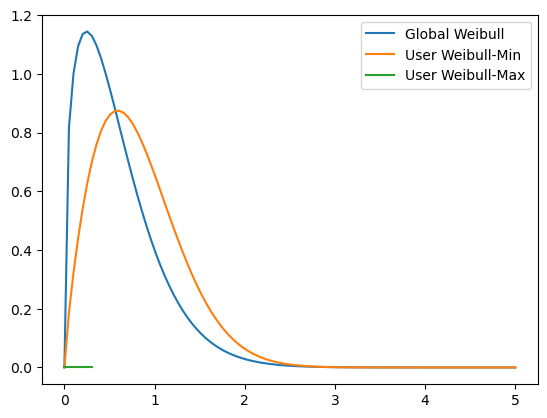

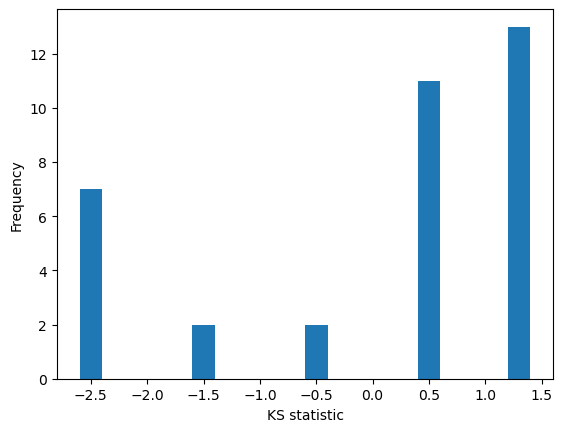

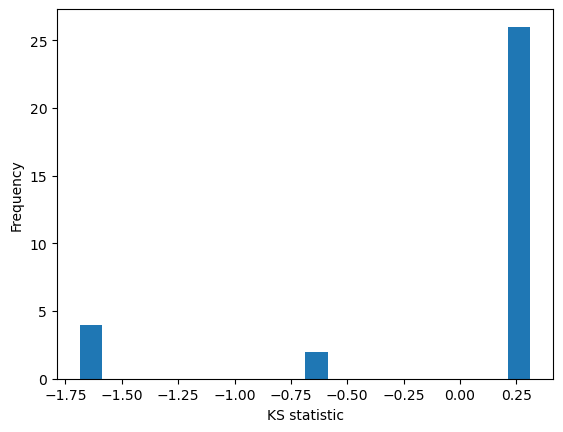

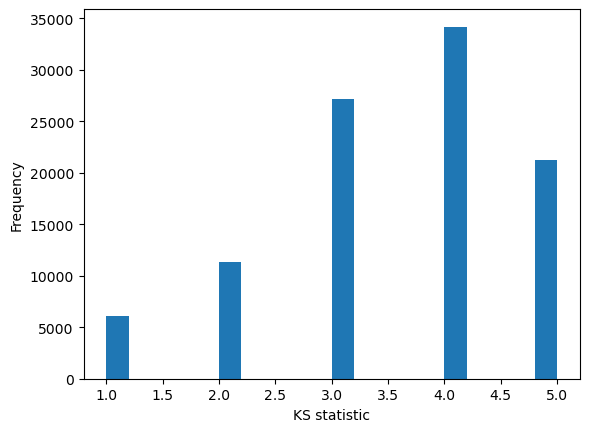

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.stats import entropy

# Load MovieLens data
ratings = pd.read_csv('data/u.data', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

# Remove all 0 ratings
#ratings = ratings[ratings['rating'] != 0]

# Create rating matrix
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
rating_matrix = np.zeros((num_users, num_movies))
for row in ratings.itertuples():
    rating_matrix[row[1]-1, row[2]-1] = row[3]

# Choose a specific user to compare to global average
user_id = 739
user_ratings = rating_matrix[user_id-1, :]
nonz_user_ratings = user_ratings[user_ratings != 0]
user_mean = np.mean(nonz_user_ratings)
norm_nonz_user_ratings = nonz_user_ratings - user_mean
print(norm_nonz_user_ratings)

# Choose a specific user to compare to global average
user_id2 = 928
user_ratings2 = rating_matrix[user_id2-1, :]
nonz_user_ratings2 = user_ratings2[user_ratings2 != 0]
user_mean2 = np.mean(nonz_user_ratings2)
norm_nonz_user_ratings2 = nonz_user_ratings2 - user_mean2
print(norm_nonz_user_ratings2)

# Fit Weibull distribution to ratings
ratings_flat = rating_matrix[rating_matrix != 0].flatten()
ratings_mean = np.mean(ratings_flat)
ratings_weibull = weibull_min.fit(ratings_flat - ratings_mean, floc=0)

# Define global Weibull distribution
global_weibull = weibull_min(*ratings_weibull)

# Fit Weibull distribution to user ratings
user_mean = np.mean(user_ratings[user_ratings != 0])
user_weibull_params = weibull_min.fit(user_ratings[user_ratings != 0] - user_mean, floc=0)
user_weibull = weibull_min(*user_weibull_params)

user_mean2 = np.mean(user_ratings2[user_ratings2 != 0])
user_weibull_params2 = weibull_min.fit(user_ratings2[user_ratings2 != 0] - user_mean2, floc=0)
user_weibull2 = weibull_min(*user_weibull_params2)

# Calculate KL divergence between user's distribution and global Weibull
#kl_divergence = entropy(pk=user_weibull.pdf(user_ratings[user_ratings != 0].flatten() - user_mean), qk=global_weibull.pdf(ratings_flat - ratings_mean))

# Plot global Weibull distribution and user's Weibull distribution
x = np.linspace(0, 5, 100)
plt.plot(x, global_weibull.pdf(x), label='Global Weibull')
plt.plot(x, user_weibull.pdf(x), label='User Weibull-Min')
plt.plot(x, user_weibull2.pdf(x), label='User Weibull-Max')
plt.legend()
plt.show()

# Plot histogram of KS statistics
plt.hist(norm_nonz_user_ratings, bins=20)
plt.xlabel('KS statistic')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of KS statistics
plt.hist(norm_nonz_user_ratings2, bins=20)
plt.xlabel('KS statistic')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of KS statistics
plt.hist(ratings_flat, bins=20)
plt.xlabel('KS statistic')
plt.ylabel('Frequency')
plt.show()


#print(f'KL divergence: {kl_divergence:.4f}')


In [38]:
ratings_flat[:30]

array([5., 3., 4., 3., 3., 5., 4., 1., 5., 3., 2., 5., 5., 5., 5., 5., 3.,
       4., 5., 4., 1., 4., 4., 3., 4., 3., 2., 4., 1., 3.])

In [39]:
len(ratings_flat)

100000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


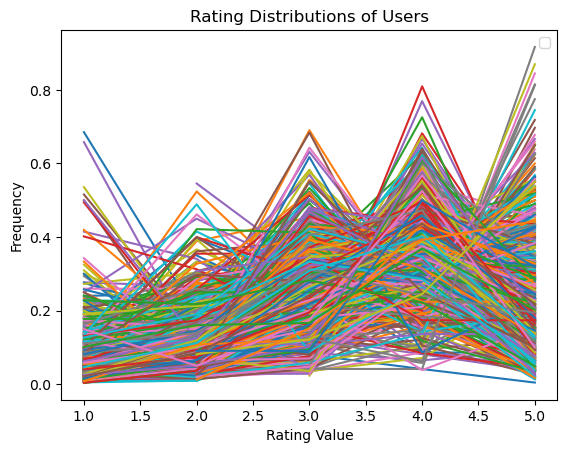

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Example rating matrix (user-item matrix)
#rating_matrix = np.random.randint(low=0, high=5, size=(5, 10))

# Create a figure and axis object
fig, ax = plt.subplots()

count = 0
# Loop over each row (user) in the rating matrix
for i in range(rating_matrix.shape[0]):
    # Get the rating distribution for the current user
    #if(count == 20):
        user_ratings = rating_matrix[i, :]
        user_ratings = user_ratings[user_ratings != 0]
        
    
        # Get the rating distribution for the current user
        unique_ratings, counts = np.unique(user_ratings, return_counts=True)
        rating_distribution = counts / np.sum(counts)
    
        # Plot the user's rating distribution using a line plot
        ax.plot(unique_ratings, rating_distribution) #, label=f'User {i+1}')
    
    #    count = 0
    #count += 1

# Adjust the spacing between subplots

# Set the plot title and axis labels
ax.set_title('Rating Distributions of Users')
ax.set_xlabel('Rating Value')
ax.set_ylabel('Frequency')
        
# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


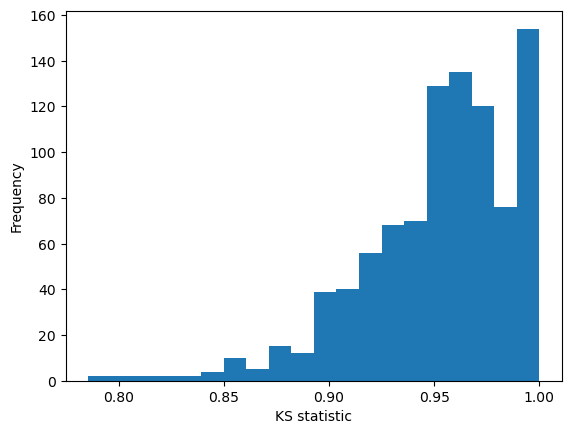

Stored 'Cr' (list)


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.stats import entropy
from scipy.stats import ks_2samp
import scipy.stats

# Load MovieLens data
ratings = pd.read_csv('data/u.data', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

# Remove all 0 ratings
#ratings = ratings[ratings['rating'] != 0]

# Create rating matrix
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
rating_matrix = np.zeros((num_users, num_movies))
for row in ratings.itertuples():
    rating_matrix[row[1]-1, row[2]-1] = row[3]

# Fit Weibull distribution to ratings
ratings_flat = rating_matrix[rating_matrix != 0].flatten()
ratings_mean = np.mean(ratings_flat)
ratings_weibull = weibull_min.fit(ratings_flat - ratings_mean, floc=0)

# Define global Weibull distribution
global_weibull = weibull_min(*ratings_weibull)

# Calculate KS statistic for each user
Cr = []
Cr_index = []
for user_id in range(1, num_users+1):
    user_ratings = rating_matrix[user_id-1, :]
    nonzero_user_ratings = user_ratings[user_ratings != 0]
    
    if np.count_nonzero(user_ratings) == 0:
        continue
    user_mean = np.mean(nonzero_user_ratings)
    #user_weibull_params = weibull_min.fit(user_ratings[user_ratings != 0] - user_mean, floc=0)
    #user_weibull = weibull_min(*user_weibull_params)
    ks_statistic, _ = ks_2samp(nonzero_user_ratings - user_mean, global_weibull.rvs(len(nonzero_user_ratings)) - ratings_mean)
    aa = [ks_statistic, int(user_id)]
    Cr.append(ks_statistic)
    #print(aa, Cr[user_id-1])
    Cr_index.append(aa)
    #print(len(nonzero_user_ratings), ks_statistic)

# Plot histogram of KS statistics
plt.hist(Cr, bins=20)
plt.xlabel('KS statistic')
plt.ylabel('Frequency')
plt.show()

%store Cr


Minimum value's index: 219
Minimum value: 0.7857142857142857
Maximum value's index: 930
Maximum value: 1.0


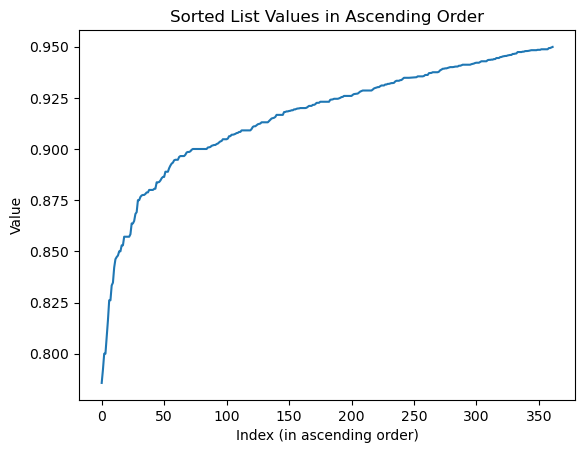

943 131
Indices of items with value equal to 1.0: [11, 28, 30, 32, 34, 40, 46, 48, 54, 62, 69, 75, 85, 102, 103, 106, 107, 108, 109, 112, 115, 133, 135, 141, 144, 154, 156, 157, 162, 165, 166, 171, 172, 182, 183, 192, 206, 207, 242, 256, 274, 276, 285, 303, 318, 320, 330, 356, 360, 377, 378, 385, 387, 397, 401, 411, 421, 432, 439, 442, 447, 461, 462, 464, 468, 470, 471, 478, 483, 491, 502, 510, 511, 514, 517, 541, 545, 550, 553, 565, 579, 584, 595, 597, 599, 608, 610, 613, 627, 637, 647, 652, 663, 671, 681, 682, 686, 701, 702, 721, 724, 729, 745, 751, 763, 768, 785, 786, 800, 814, 815, 825, 828, 833, 850, 856, 860, 866, 867, 874, 889, 892, 896, 901, 905, 910, 913, 916, 921, 929, 931]


In [101]:

my_list = Cr_index

sorted_list = sorted(my_list, key=lambda x: x[0])  # Sort the list by the value of the first item

min_item = sorted_list[0]  # Get the first item in the sorted list (minimum value and index)
max_item = sorted_list[-1]  # Get the last item in the sorted list (maximum value and index)

print("Minimum value's index:", min_item[1])
print("Minimum value:", min_item[0])
print("Maximum value's index:", max_item[1])
print("Maximum value:", max_item[0])

# Extract the values and indices from the sorted list
#values = [item[0] for item in sorted_list]

values = [item[0] for item in sorted_list if item[0] < 0.95]


# Plot the values of the sorted list in ascending order as a line plot
fig, ax = plt.subplots()
ax.plot(range(len(values)), values)

# Set the plot title and axis labels
ax.set_title('Sorted List Values in Ascending Order')
ax.set_xlabel('Index (in ascending order)')
ax.set_ylabel('Value')

# Show the plot
plt.show()

# Extract the indices of items with value equal to 1.0
indices = [item[1]+1 for item in my_list if item[0] == 1]

print(len(my_list), len(indices))

# Print the indices
print(f"Indices of items with value equal to 1.0: {indices}")


In [66]:
import numpy as np
from scipy.stats import ks_2samp

# Load MovieLens data
ratings = pd.read_csv('data/u.data', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

# Remove all 0 ratings
ratings = ratings[ratings['rating'] != 0]

# Create rating matrix
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
rating_matrix = np.zeros((num_users, num_movies))
for row in ratings.itertuples():
    rating_matrix[row[1]-1, row[2]-1] = row[3]

# Fit Weibull distribution to ratings
ratings_flat = rating_matrix[rating_matrix != 0].flatten()

# Compute the overall rating distribution
overall_ecdf = np.cumsum(np.histogram(ratings_flat, bins=5, range=(1, 6))[0]) / len(ratings_flat)

# Compute the ECDF for each user's rating distribution
user_ecdfs = []
for user_ratings in rating_matrix:
    ecdf = np.cumsum(np.histogram(user_ratings[user_ratings != 0], bins=5, range=(1, 6))[0])
    ecdf = ecdf / ecdf[-1]
    user_ecdfs.append(ecdf)

# Compute the KS statistic between each user's rating distribution and the overall distribution
ks_statistics = []
Cr = []
for ecdf in user_ecdfs:
    ks_stat, _ = ks_2samp(ecdf, overall_ecdf)
    ks_statistics.append(ks_stat)
    Cr.append(ks_stat)

# Identify users with unique rating distributions
unique_users = np.where(np.array(ks_statistics) > 0.1)[0]
%store Cr


[0.2,
 0.2,
 0.2,
 0.4,
 0.4,
 0.2,
 0.2,
 0.2,
 0.4,
 0.4,
 0.2,
 0.4,
 0.4,
 0.2,
 0.4,
 0.4,
 0.2,
 0.4,
 0.2,
 0.2,
 0.4,
 0.4,
 0.2,
 0.4,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.4,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.4,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.4,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.4,
 0.4,
 0.4,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.4